In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
# hyperparameters
batch_size = 128
num_classes = 2    # 0: cat, 1: dog

In [3]:
# define transforms for validation data
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
# load data
val_dataset = torchvision.datasets.ImageFolder(root='./dataset/validation_dataset', transform=val_transform)

# data loader
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# define 2 different models

# original model
model = torchvision.models.resnet50(num_classes=num_classes)
model.load_state_dict(torch.load('./model/cat_dog_resnet50.pth', map_location=torch.device('cpu')))

# wiht random erasing
model_re = torchvision.models.resnet50(num_classes=num_classes)
model_re.load_state_dict(torch.load('./model/cat_dog_resnet50_re.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [10]:
# validation
model.eval()
model_re.eval()

correct = 0
correct_re = 0

with torch.no_grad():
    for images, labels in tqdm(val_loader):
        # original model
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

        # model with random erasing
        outputs_re = model_re(images)
        _, predicted_re = torch.max(outputs_re.data, 1)
        correct_re += (predicted_re == labels).sum().item()

100%|██████████| 15/15 [05:17<00:00, 21.15s/it]

Accuracy of the network on the validation images: 96 %


In [14]:
# compare the accuracy

model_accuracy = 100 * correct / len(val_dataset)
model_re_accuracy = 100 * correct_re / len(val_dataset)

print('Accuracy of the original model: %d %%' % model_accuracy)
print('Accuracy of the model with random erasing: %d %%' % model_re_accuracy)

Accuracy of the original model: 96 %
Accuracy of the model with random erasing: 97 %


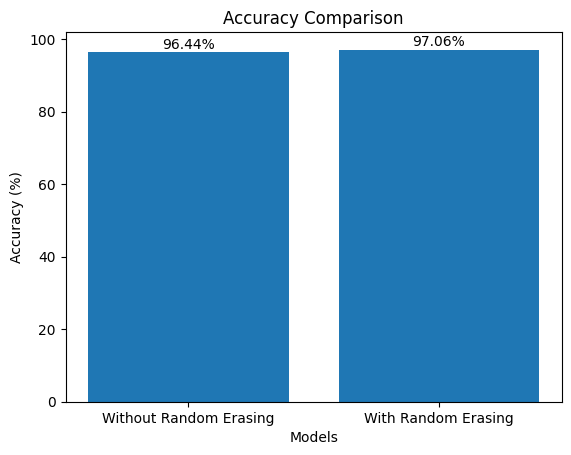

In [24]:
# plot comparison

# x-axis
models = ['Without Random Erasing', 'With Random Erasing']
# y-axis
accuracies = [model_accuracy, model_re_accuracy]

# adding text labels to each bar
for i in range(len(models)):
    plt.text(models[i], accuracies[i] + 1, f'{accuracies[i]:.2f}%', ha='center')

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.savefig('model_comparison.png')
plt.show()